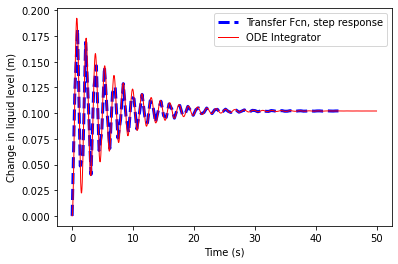

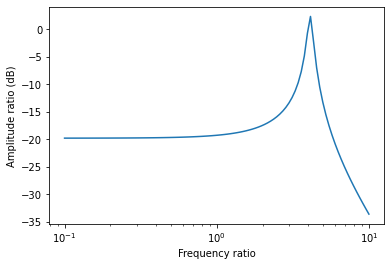

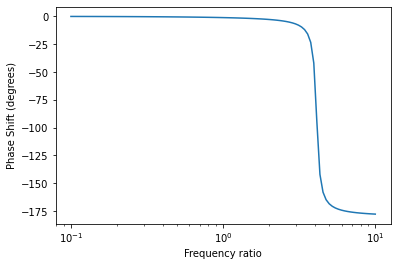

In [1]:
# %% Imports

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy import signal


# These are published and would have to be given

g = 9.81 #Acceleration due to gravity (m/s^2)
mu = 0.100e-5 #Kinmetaic viscosity of manometer fluid (m^2/s)
rho = 998.2 #Density of manometer fluid (kg/m^3)
R = 0.005 #Diameter of the manometer (m)
L = 1.157 #Total length of the manometer tube (m)


# Compute constants for standard form ODE of a 2nd order system

# tau**2 * dy2/dt2 + 2*zeta*tau*dy/dt + y = Kp*F(t)

taup = (L/(2.0*g))**(0.5) # time constant
Kp = (1/(rho*g))*1e3 # gain (The 1000 represents a step change of 1kPa)
zeta = (8.0*mu*L)/(g*(2*R)**2)*(1.0/taup) # damping factor
theta = 0.0 # no time delay


def f(t, y):
# Function that contains the RHS of the ordinary differential equation
#For step response use np.heaviside(t,1)
#For ramp response use np.heaviside(t,1)*t
#For sinusoidal response use np.sin(np.pi*t*taup)
    dydt = y[1]
    dy2dt2 = (-2.0*zeta*taup*dydt - y[0] + Kp*np.heaviside(t,1))/taup**2
    return [dydt,dy2dt2]





# %% Define time spans, initial values, and constants

tspan = np.linspace(0, 50, 1000)
yinit = [0,0] #initial value for funbction and first derivative


# %% Solve differential equation

sol = solve_ivp(lambda t, y: f(t, y),
                [tspan[0], tspan[-1]], yinit, method='LSODA', t_eval=tspan)


#Alternate technique: Transfer Function

num = [Kp]
den = [taup**2,2*zeta*taup,1]
sys1 = (num,den)
t1,y1 = signal.step(sys1)


# Commands for plotting

plt.figure(1)
plt.plot(t1,y1,'b--',linewidth=3,label='Transfer Fcn, step response')
plt.plot(sol.t,sol.y[0],'r-',linewidth=1,label='ODE Integrator')
plt.xlabel('Time (s)')
plt.ylabel('Change in liquid level (m)')
plt.legend(loc='best')
plt.show()


#Something extra; for making Bode plots

w, mag, phase = signal.bode(sys1)

plt.figure()

plt.semilogx(w, mag) # Bode magnitude plot

plt.xlabel('Frequency ratio')

plt.ylabel('Amplitude ratio (dB)')

plt.figure()

plt.semilogx(w, phase) # Bode phase plot

plt.xlabel('Frequency ratio')

plt.ylabel('Phase Shift (degrees)')

plt.show()